In [ ]:
!pip install konlpy

In [3]:
from IPython.display import Image
import pandas as pd
from konlpy.tag import Komoran, Okt, Hannanum, Kkma
import re

# **4.4 잠재 의미 분석**

## **잠재 의미 분석** 

* **잠재 의미 분석**이란 단어-문서 행렬이나 TF-IDF 행렬, 단어-문맥 행렬 같은 큰 행렬에 **특이값 분해**를 수행하여 데이터의 차원수를 줄여서 계산의 효율성 높여 행간에 숨어 있는 **잠재 의미**를 끌어내기 위한 방법론입니다.
* 기존의 DTM이나 TF-IDF은 단어의 빈도 수를 이용하는 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있습니다. 








### **PMI 행렬** 

**PMI(Pointwise Mutual Information)**, 점별 상호 정보량은 두 확률변수 사이의 상관성을 계량화한 지표입니다.

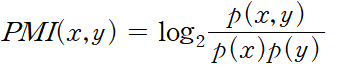

In [3]:
Image("./images/PMI.PNG")

* **P(x)**: x가 일어날 확률  
* **P(y)**: y가 일어날 확률  
* **P(x,y)**: x,y가 동시에 일어날 확률

*PMI값이 높을수록 관련성이 높다는 의미입니다.

단어 A,B가 한번도 같이 등장하지 않는 경우 PMI(A,B) = log0 = −∞이 됩니다. 그렇기 때문에 자연어 처리 분야에서는 PMI를 대신하여 **양의 점별 상호 정보량(PPMI)**를 사용합니다.

### **PPMI**

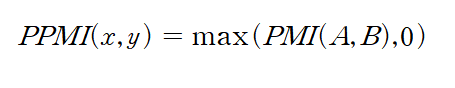

In [ ]:
Image("./images/PPMI.PNG")

PMI가 음수일 때는 그 값을 신뢰하기 어려워 0으로 취한하여 무시한다는 뜻입니다.

### **SPMI**

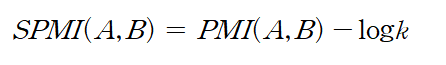

In [ ]:
Image("./images/SPMI.PNG")

PMI에서 log k를 빼준 값으로 K는 임의의 양의 상수입니다.

## **행렬 분해로 이해하는 잠재 의미 분석**

**특이값 분해(SVD)**는 m X n 크기의 임의의 사각행렬 A를 아래의 그림과 같이 분해하는 것을 말합니다.

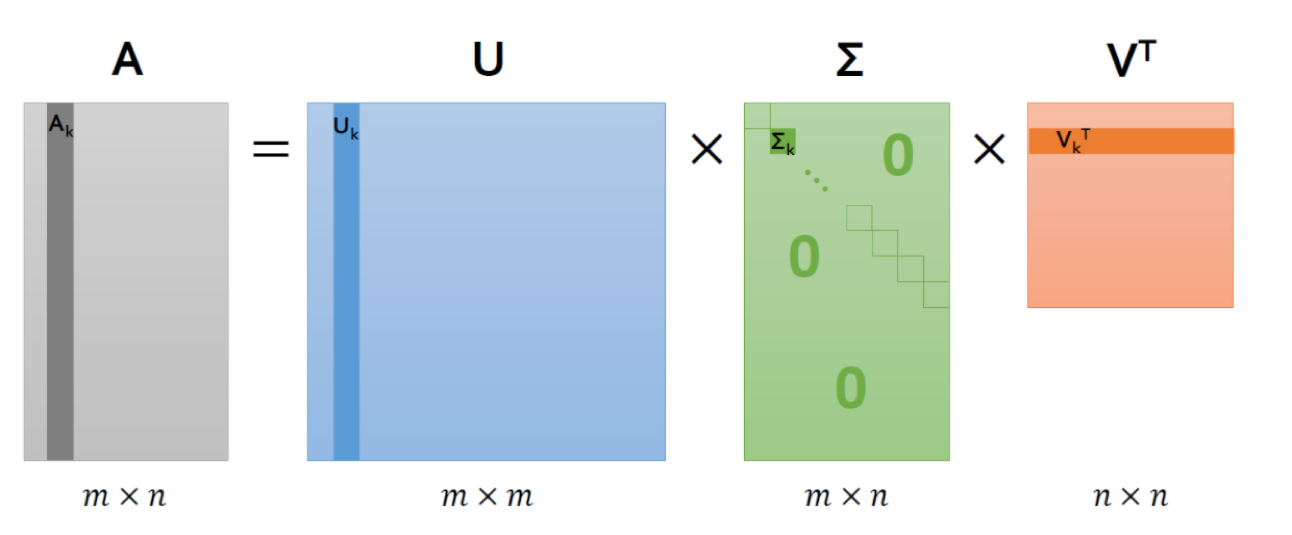

In [ ]:
Image("./images/SVD.png")

### **Truncated SVD**


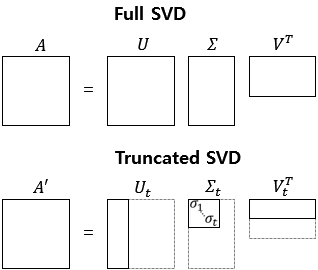

In [ ]:
Image("./images/truncated_SVD.png")

* truncated SVD는 대각행렬Σ의 대각 원소값 중에서 상위값 t개만 남게 됩니다. 또한 U행렬과 V행렬도 t열까지만 남게 됩니다. 여기서 t는 토픽의 수를 반영한 하이퍼파라미터값을 의미합니다.   
* t를 크게 잡으면 행렬 A로부터 다양한 의미를 가져올수 있지만 t를 작게 잡아야지 노이즈를 제거할 수 있기 때문에 t를 선택하는 것은 어려운 일입니다.

이렇게 하게되면 full SVD보다 계산비용을 줄이는 효과를 볼 수 있습니다. **자연어 처리의 관점**에서 보면 **설명력이 낮은 정보를 삭제하고 설명력이 높은 정보를 남긴다**는 의미를 갖고 있습니다.

### **LSA 실습**

In [4]:
data=pd.read_csv("/content/drive/My Drive/임베딩/prepr_job.csv") # /content/drive/My Drive/임베딩/jobkorea_all.csv

In [7]:
data['답변'][1]

'내 가족 내 물건같이 생각하는 책임감 대학교에서 경제학을 전공하며 배운 다양한 경제이론들과 유통 관련 수업에서 배운 지식을 실무에 직접 적용해보고 싶어 백화점 식품 판매 ar를 하였습니다 처음엔 단순 대면 판매로 시작했지만 고객들에게 높은 cs 평가를 받고 매니저들에게도 성실함으로 좋은 평판을 얻어 다양한 업무를 맡는 기회를 얻었습니다 매출 저조 브랜드 전담 판매와 재고 관리 제품의 발주 발송 업무와 함께 미숙한 아르바이트생들의 교육까지 다양한 업무를 했습니다 ar에게는 버거울 수도 있는 다양한 업무를 했음에도 어려움 없이 할 수 있었던 것은 제가 대하는 모든 사람은 제 가족처럼 제가 맡은 제품은 제 물건처럼 소중히 대해야 한다는 책임감을 가지고 업무를 수행했기 때문입니다 또한 고객과 조직원 모두를 가족같이 생각해 고객에게는 그들이 만족할 수 있는 최고의 서비스를 제공하고 조직원들과는 끊임없는 소통을 통해 좋은 관계를 유지하면서도 효율적으로 업무를 수행해 낼 수 있도록 노력했습니다 또한 맡은 제품에 이상이 생기지 않도록 매일 재고관리로 아침을 시작하고 고객에게 배송되는 물건은 항상 직접 눈으로 확인하는 등 모든 것을 내 물건이라고 생각하여 책임감을 가지고 항상 소중히 여겼습니다 이렇게 효율적인 업무 수행에있어 반드시 필요한 책임감을 바탕으로 성공적으로 다양한 업무를 수행해 낸 실무 경험을 통해 고객 경영주 회사에 신뢰를 얻어 매출이라는 가시적인 성과를 만들어내 코리아세븐의 끊임없는 발전에 기여할 수 있는 영업 인재로 성장해 나가겠습니다'

In [5]:
komoran=Komoran()

In [6]:
data["nouns"] = data["답변"].apply(lambda x: komoran.morphs(x)) #형태소 추출 
data["nouns"].head()

0    [능동, 적, 이, ㄴ, 직무, 수행, 의, 기회, 코리아세븐, 유통업, 에, 대하...
1    [내, 가족, 내, 물건, 같이, 생각, 하, 는, 책임감, 대학교, 에서, 경제학...
2    [열정, 과, 창의, 능동, 성, 을, 통하, ㄴ, 성과, 직접, 제안, 하, ㄴ,...
3    [역량, 발전, 을, 위하, ㄴ, 노력, 데이터, 분석, 능력, 소통, 능력, 코리...
4    [편안, 하, ㄴ, 서비스, 상권, 과, 시즌, 에, 맞, 는, 운영, 최근, 세븐...
Name: nouns, dtype: object

In [7]:
data["nouns"] = data["nouns"].apply(lambda x : [nouns for nouns in x if len(nouns) > 1])

In [11]:
data["nouns"].head()

0    [능동, 직무, 수행, 기회, 코리아세븐, 유통업, 대하, 관심, 으로, 백화점, ...
1    [가족, 물건, 같이, 생각, 책임감, 대학교, 에서, 경제학, 전공, 배우, 다양...
2    [열정, 창의, 능동, 통하, 성과, 직접, 제안, 아이디어, 통하, 성과, 경험,...
3    [역량, 발전, 위하, 노력, 데이터, 분석, 능력, 소통, 능력, 코리아세븐, 영...
4    [편안, 서비스, 상권, 시즌, 운영, 최근, 세븐일레븐, 라스트, 더라는, 앱과,...
Name: nouns, dtype: object

In [8]:
tokenized_doc = data['nouns']
detokenized_doc = []
for i in range(len(data)):
    a = ' '.join(tokenized_doc[i])
    detokenized_doc.append(a)
data['답변2'] = detokenized_doc

In [12]:
data['답변2'].head()

0    능동 직무 수행 기회 코리아세븐 유통업 대하 관심 으로 백화점 에서 다년간 ar 경...
1    가족 물건 같이 생각 책임감 대학교 에서 경제학 전공 배우 다양 경제 이론 유통 관...
2    열정 창의 능동 통하 성과 직접 제안 아이디어 통하 성과 경험 에서 현실 안주 새롭...
3    역량 발전 위하 노력 데이터 분석 능력 소통 능력 코리아세븐 영업 관리 직무 수행 ...
4    편안 서비스 상권 시즌 운영 최근 세븐일레븐 라스트 더라는 앱과 제휴 폐기 줄이 이...
Name: 답변2, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000) # TF-IDF 행렬을 몇개로 만들지에 대한 옵션
X = vectorizer.fit_transform(data['답변2'])

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=15, learning_method='online', random_state=777, max_iter=1)
# n_components: 토픽 수(default:10)
# learning_method: 업데이터 방법(default:batch) 일반적으로 데이터가 크면 온라인 업데이트가 빠르다.
  ## batch: 데이터를 모두 사용해 훈련
  ## online: 데이터를 순차적으로 한 개씩 또는 미니배치(Mini-Batch)라 부르는 작은 묶음 단위로 주입하여 시스템을 훈련
# max_iter: 최대 반복 횟수
lda_top = lda_model.fit_transform(X)

In [21]:
terms = vectorizer.get_feature_names() 
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d :" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n -1:-1]])
get_topics(lda_model.components_, terms)

Topic 1 : [('실험', 53.49), ('측정', 7.84), ('사진', 5.99), ('해석', 5.19), ('외국인', 4.22)]
Topic 2 : [('화학', 0.07), ('습니다', 0.07), ('리더십', 0.07), ('동아리', 0.07), ('진학', 0.07)]
Topic 3 : [('고객', 381.6), ('습니다', 341.1), ('영업', 178.12), ('매출', 144.0), ('매장', 143.73)]
Topic 4 : [('물류', 176.16), ('글로벌', 87.91), ('시장', 85.96), ('해외', 81.72), ('중국', 81.17)]
Topic 5 : [('습니다', 1669.03), ('으로', 516.07), ('에서', 474.06), ('ㅂ니다', 461.04), ('사람', 441.89)]
Topic 6 : [('습니다', 701.92), ('ㅂ니다', 354.39), ('생산', 332.92), ('에서', 326.54), ('으로', 298.03)]
Topic 7 : [('습니다', 694.44), ('ㅂ니다', 349.68), ('업무', 309.71), ('으로', 253.59), ('생각', 236.25)]
Topic 8 : [('the', 74.26), ('to', 72.51), ('and', 71.73), ('it', 8.19), ('음식', 0.08)]
Topic 9 : [('습니다', 430.37), ('ㅂ니다', 280.77), ('고객', 228.49), ('업무', 215.56), ('으로', 212.45)]
Topic 10 : [('습니다', 470.08), ('팀원', 268.86), ('프로젝트', 219.62), ('으로', 148.26), ('진행', 147.38)]
Topic 11 : [('전산', 23.75), ('자금', 11.52), ('단체', 4.87), ('재무', 4.64), ('회계', 3.44)]
Topic 12 : [('개발',

In [1]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=15,
                        algorithm='randomized',
                        n_iter=100,
                        random_state=122)
svd_model.fit(X)

## **행렬 분해로 이해하는 Word2vec**

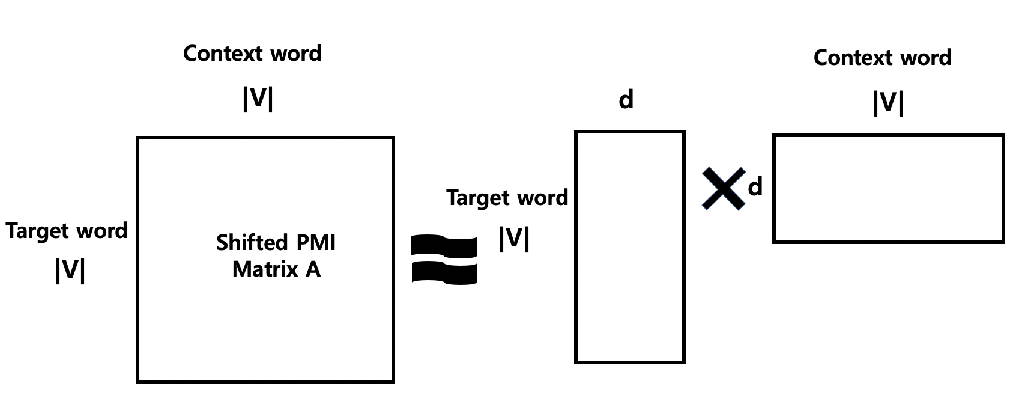

In [50]:
Image("./images/word2vec_PMI.png")

* Negative sampling 기법으로 학습된 Word2Vec의 Skip-gram 모델은 Shifted PMI 행렬을 분해한 것과 같습니다.

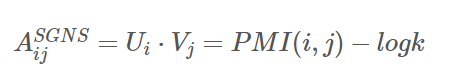

In [51]:
Image("./images/word2vec_PMI2.png")

* Aij는 SPMI행렬의 i,j번째 원소입니다. k는 Skip-gram 모델의 negative sample 수를 의미하고 k=1인 negative sample 수가 1개인 Skip-gram 모델은 PMI 행렬을 분해하는 것과 같습니다.  
* 말뭉치에서 두 단어가 자주 같이 등장하면 SPMI가 높고 반대의 경우라면 낮게 됩니다. 다시 말하자면 SPMI값이 높다는 것은 두 단어가 의미상 관련이 있을 가능성이 높다고 이해할 수 있습니다.

# **Glove**

* **글로브(Global Vectors for Word Representation)**는 스탠포드 대학에서 개발한 단어 임베딩 기법입니다.
* 카운트 기반과 예측 기반을 모두 사용하는 방법론입니다.

## **기존 모델의 문제점**

* **Word2vec** : 단어 벡터 사이의 유사도를 측정하는 데에 LSA보다 유리하지만 임베딩 벡터가 윈도우 내의 로컬 문맥만 학습하기 때문에 말뭉치 전체의 통계 정보가 반영되기는 어려움이 있다.
* **LSA** : 말뭉치 전체의 통계량을 모두 활용할 수 있지만 단어/문서 간 유사도를 측정하기는 어렵다는 단점이 있습니다.

##### **GloVe** 두개의 한계를 극복하기 위해서 LSA의 카운트 기반의 방법과 Word2Vec의예측 기반의 방법론 두 가지를 모두 사용합니다.  
##### **"임베딩된 단어벡터 간 유사도 측정을 수월하게 하면서도 말뭉치 전체의 통계 정보를 좀 더 잘 반영해보자"**가 GloVe가 지향하는 핵심 목표입니다.

## **모델 기본 구조**

 **GloVe**는 임베딩된 두 단어벡터의 내적이 말뭉치 전체에서의 동시 등장확률 로그값이 되도록 **목적함수**를 정의했습니다.

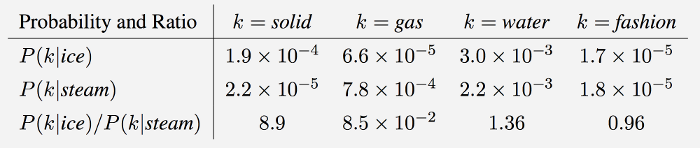

In [ ]:
Image("./images/Glove.png")

위의 표는 말뭉치에서 동시에 같이 등장하는 단어의 빈도를 세어서 전체 말뭉치의 개수로 나누어준 **동시등장확률(the words' probability of co-occurrence)**이라고 부릅니다.

표를 해석해 보면 **ice**라는 단어가 주어졌을 때 **solid**가 등장할 확률은 **steam**이 주어졌을 때 **solid**가 나타날 확률보다 높고 그 값은 1보다 큰 8.9라는 값이 나왔습니다. 이와 반대로 P(gas|ice)/P(gas|steam)은 1보다 작은 값인 0.0085가 나왔습니다.



Glove 연구팀은 k가 주어졌을 때 임베딩된 두 단어벡터의 내적이 두 단어의 동시등장확률 간 비율과 비슷하게끔 임베딩하려고 연구를 했습니다. 즉 solid라는 단어가 주어졌을 때 ice와 steam 벡터 사이의 내적값이 8.9가 되도록 한다고 말할 수 있습니다.

## **Glove의 목적함수**

먼저 다음과 같이 식을 정의한 후에 이 식을 만족하는 함수 $F$를 찾고자 하였습니다.

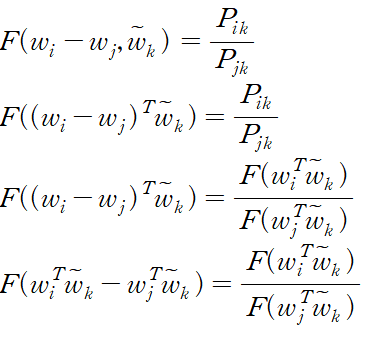

In [31]:
Image("./images/Glove3.PNG")

Pik 는 P(k|i)로 정의 하였습니다. i번째 단어 주변에 k번째 단어가 등장할 조건부확률이라는 뜻입니다. 표를 예시로 들자면 P(solid|ice)라고 비유할 수 있습니다.  
Pik/Pjk 도 표를 예시로 설명하자면 P(solid|ice)/P(solid|steam)=8.9라고 할 수 있습니다. 

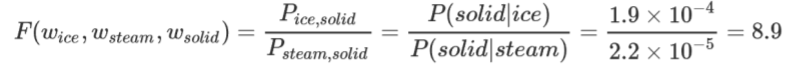

In [32]:
Image("./images/Glove2.PNG")

### **3가지 조건**

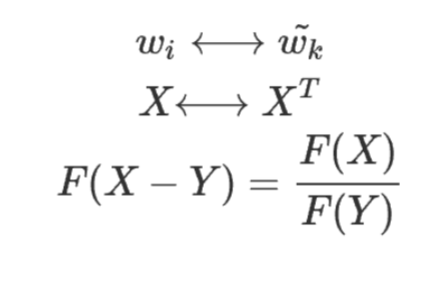

In [33]:
Image("./images/Glove4.PNG")

* wi , wk 를 서로 바꾸어도 같은 값을 가져야 한다.
*코퍼스 전체에서 구한 co-occurrence matrix X는
대칭행렬(symmetric matrix)이므로 함수는 이런
특징을 포함해야 한다.
*Homomorphism조건을 만족해야 한다.

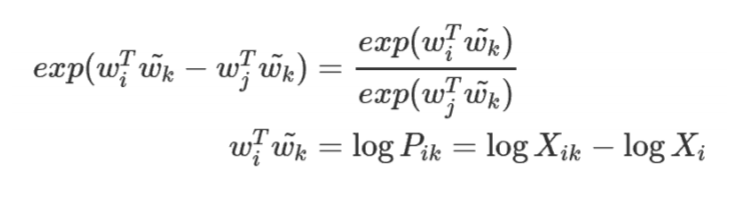

In [34]:
Image("./images/Glove5.PNG")

* 이러한 조건을 만족하는 함수는 지수함수, F를 exp로 지환하고 정리합니다.
* 위의 조건에 의하면 wi와 wk를 서로 바꾸어도 식이 성립해야 합니다.  
그렇다면  log(Pik)=log(Pki)이 성립해야 합니다. 그런데 log(Xik)−log(Xi), log(Xki)−log(Xk)가 되어서 서로 값이 달라집니다. 이 때문에 GloVe 연구팀은 log(Xi) 이 부분을 아래와 같이 상수항(bi, bk)으로 처리하여서 이 조건을 만족하도록 식을 한번 더 변환하였습니다.

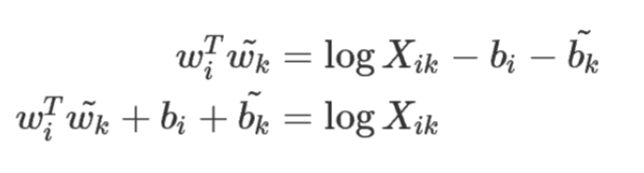

In [35]:
Image("./images/Glove6.PNG")

* 위 식에서 미지수는 좌변이고, 우변의 log(Xik)는 우리가 이미 알고 있는 값입니다. log(Xik)는 co-occurrence
matrix에 로그값을 취한값입니다.

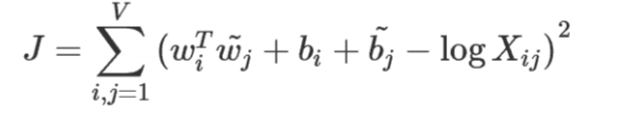

In [36]:
Image("./images/Glove7.PNG")

* 이 차이를 최소한으로 하는 것이 목적함수입니다.

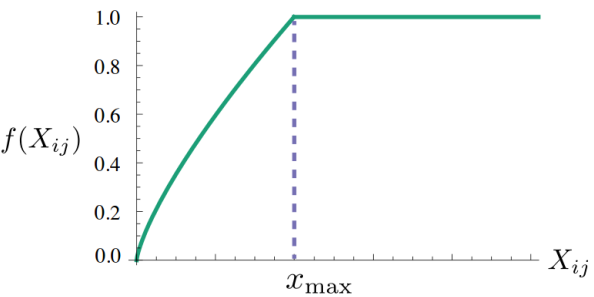

In [37]:
Image("./images/Glove8.PNG")

* 마지막으로 목적함수에 위 모양과 같은 모양의 f(x)를 추가하였습니다. Xij가 특정 값 이상으로 튀는 경우(학습 말뭉치에서 지나치게 빈도가 높게 나타나는 단어) 이를 방지하고자 하는 장치라고 합니다.

### **Glove 실습**

In [38]:
!pip install glove_python

In [ ]:
from glove import Corpus, Glove

corpus = Corpus() 
corpus.fit(data['nouns'], window=5)
glove = Glove(no_components=100, learning_rate=0.05)
#no_components: 아웃풋 벡터의 차원
#learning_rate: 학습률
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
#epochs: 훈련 횟수
#no_threads: 쓰레드 개수
# verbods: 설명 
glove.add_dictionary(corpus.dictionary)

In [40]:
glove.most_similar("컴퓨터",number=10)

[('다루', 0.6974357525131406),
 ('프로그래밍', 0.642936562333758),
 ('120', 0.6327625572171408),
 ('20151', 0.5923195244370654),
 ('수학', 0.5783171567272305),
 ('학원', 0.5739631799588342),
 ('데이터베이스', 0.5712840427725904),
 ('무선 센서 네트워크', 0.5692750997039806),
 ('20111', 0.5633246285154203)]

# **Swivel**

Google 연구팀이 발표한 행렬 분해 기반의 단어 임베딩 기법입니다. PMI 행렬을 U와 V로 분해하고, 학습이 종료되면 U를 단어 임베딩으로 쓸 수 있고 U+V.t, U와 V.t를 이어 붙여서도 임베딩으로 사용할 수 있습니다.

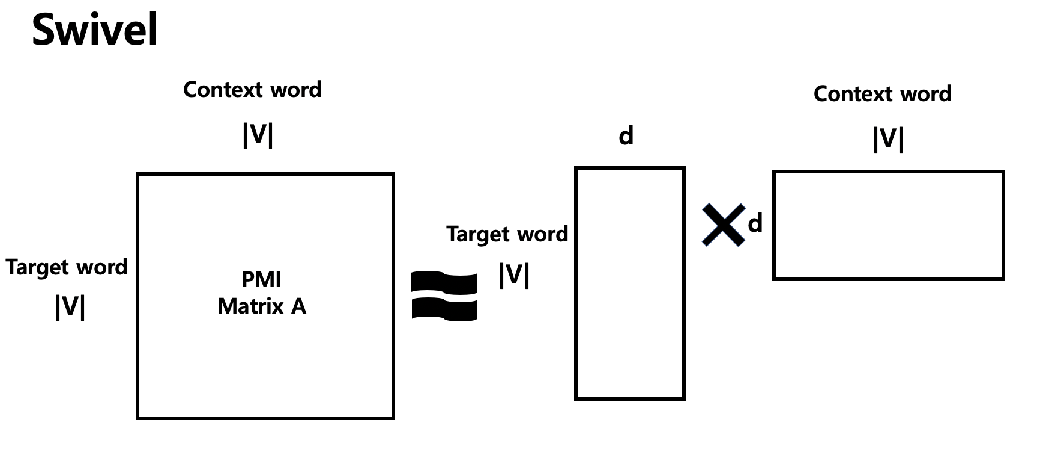

In [46]:
Image("./images/Swivel.png" )

### **모델 기본 구조**

* PMI 행렬을 분해한다는 점에서 단어-문맥 행렬을 분해하는 GloVe와 다릅니다.  
* Swivel은 목적함수를 PMI의 단점을 보완할 수 있도록 하였습니다.

#### **목적함수 1(말뭉치에 동시 등장한 케이스가 한 건이라도 있는 경우**

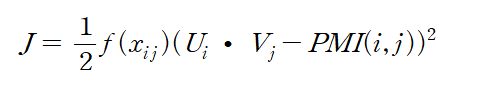

In [47]:
Image("./images/Swivel1.png" )

* **(U,i)**: 타킷 단어 i에 대응하는 벡터
* **(V,j)**: 문맥 단어 j에 해당하는 벡터
* **f(x,i,j)**: 단어 i,j의 동시 등장 빈도

f(x,i,j)의 값이 클수록 벡터 간 내적 값이 실제 PMI값과 비슷해야 학습 손실이 줄어들게 됩니다. 즉 i,j가 같이 자주 등장할수록 두 단어에 해당하는 벡터의 내적이 PMI값과 일치하도록 더욱 **강제**한다는 뜻입니다.

#### **목적함수 2(말뭉치에 동시 등장한 케이스가 한 건도 없는 경우**

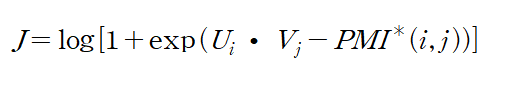

In [52]:
Image("./images/Swivel2.png" )

두 단어가 동시에 등장하지 않았을 경우 PMI는 음의 무한대로 발산합니다. 그래서 이와 같은 케이스를 위해서 목적함수를 별도로 설정하였습니다. 위의 식을 보면 PMI*는 단어 i,j의 동시 등장 횟수를 0으로 가정하고 계산한 PMI값입니다. 

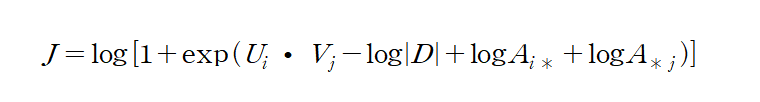

In [53]:
Image("./images/Swivel3.png" )

다음 식은 PMI값을 좀더 세밀하게 표현한 식입니다.



1.   단어 i,j가 고빈도 단어인데 두 단어의 동시 등장 빈도가 0이라면 두 단어는 같이 등장하지 않는, 의미상 무관계한 단어라고 가정합니다.  
ex) 무모, 운전 두개의 단어는 단독으로는 자주 등장하지만 두 단어가 같이 쓰이는 경우는 거의 없습니다다.  
=> 이때 두 단어에 해당하는 벡터의 내적 값이 PMI*보다 약간 작게 되도록 학습합니다.
2.   단어 i,j가 저빈도 단어인데 두 단어의 동시 등장 빈도가 0이라면 두 단어는 의미상 관계가 일부 있을 수 있다고 가정합니다.  
ex) 확률,분포 두개의 단어는 아주 흔하지는 않지만 통계관련 데이터에서는 자주 같이 등장하는 단어입니다. 예를들어 네이버 영화 리뷰 데이터에서 두 단어의 동시 등장 빈도가 0이라고 가정해보겠습니다.  
=> 이때 두 단어에 해당하는 벡터의 내적 값이 PMI*보다 약간 크게 되도록 학습합니다.

